In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import os

In [2]:
# load csv
data_url = '/home/victormoura/Forecasting-Optimal-Pricing/Data Files/scanner_data.csv'
data = pd.read_csv(data_url)
data.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [3]:
data['item_price'] = data['Sales_Amount']/data['Quantity']
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,item_price
0,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13
1,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46
2,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35
3,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59
4,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88


In [4]:
data.Date = pd.to_datetime(data.Date)
data.head()

/tmp/ipykernel_2621/3482317750.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.Date = pd.to_datetime(data.Date)


,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,item_price
0,2016-02-01,2547,1,X52,0EM7L,1.0,3.13,3.13
1,2016-02-01,822,2,2ML,68BRQ,1.0,5.46,5.46
2,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35,6.35
3,2016-02-01,3719,4,0H2,549KK,1.0,5.59,5.59
4,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88,6.88


In [5]:
msk = data.SKU_Category.value_counts(ascending=True).to_frame()

In [6]:
msk.describe()

,SKU_Category
count,187.000000
mean,704.310160
std,1269.811602
min,1.000000
25%,49.000000
50%,213.000000
75%,691.500000
max,10913.000000


In [7]:
msk = msk[msk['SKU_Category'] > msk['SKU_Category'].mean()].reset_index()
msk = msk['index'].to_list()

In [8]:
df_filter = data[data['SKU_Category'].isin(msk)]

In [9]:
df_filter.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,item_price
0,2016-02-01,2547,1,X52,0EM7L,1.0,3.13,3.13
1,2016-02-01,822,2,2ML,68BRQ,1.0,5.46,5.46
2,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35,6.35
3,2016-02-01,3719,4,0H2,549KK,1.0,5.59,5.59
4,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88,6.88


In [10]:
product_grain = 'SKU_Category'

df_category = df_filter.groupby(['Date',product_grain]).agg({'Quantity':'sum', 'Sales_Amount':'sum' ,'item_price':np.average}).reset_index()
df_category.head()

,Date,SKU_Category,Quantity,Sales_Amount,item_price
0,2016-01-02,01F,10.0,108.76,10.449167
1,2016-01-02,0H2,11.0,71.92,6.538182
2,2016-01-02,1EO,9.0,220.80,21.910000
3,2016-01-02,1TS,2.0,24.49,12.245000
4,2016-01-02,1VL,12.0,80.45,6.523000


In [11]:
df_category['day'] = df_category.Date.dt.day
df_category['month'] = df_category.Date.dt.month
df_category.head()

,Date,SKU_Category,Quantity,Sales_Amount,item_price,day,month
0,2016-01-02,01F,10.0,108.76,10.449167,2,1
1,2016-01-02,0H2,11.0,71.92,6.538182,2,1
2,2016-01-02,1EO,9.0,220.80,21.910000,2,1
3,2016-01-02,1TS,2.0,24.49,12.245000,2,1
4,2016-01-02,1VL,12.0,80.45,6.523000,2,1


In [12]:
df_category['SKU_Category'].value_counts().to_frame().reset_index().head(1)['index'].to_list()

['FEW']

In [13]:
df = df_category[df_category['SKU_Category'].isin(df_category['SKU_Category'].value_counts().to_frame().reset_index().head(4)['index'].to_list())]
df.head()

,Date,SKU_Category,Quantity,Sales_Amount,item_price,day,month
5,2016-01-02,29A,14.0,93.00,6.942308,2,1
14,2016-01-02,FEW,6.0,54.54,8.058000,2,1
29,2016-01-02,N8U,40.0,172.46,4.092973,2,1
36,2016-01-02,R6E,10.0,88.60,8.860000,2,1
49,2016-01-03,29A,14.0,84.87,6.422500,3,1


In [40]:
df.loc['price'] = df['Sales_Amount']/df['Quantity']

In [14]:
import plotly.express as px

In [21]:
fig = px.line(df, x='Date', y='Quantity',color = 'SKU_Category')
fig.show()

In [41]:
fig = px.line(df, x='Date', y='price',color = 'SKU_Category')
fig.show()

In [42]:
px.scatter(df, x='price',y='Quantity',color = 'SKU_Category')

In [43]:
px.histogram(df,x="price",y="Quantity",color="SKU_Category")

In [44]:
# save df for category

df.to_csv('./Data Files/df_category.csv')

## Same analysis but for product

In [45]:
data.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,item_price
0,2016-02-01,2547,1,X52,0EM7L,1.0,3.13,3.13
1,2016-02-01,822,2,2ML,68BRQ,1.0,5.46,5.46
2,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35,6.35
3,2016-02-01,3719,4,0H2,549KK,1.0,5.59,5.59
4,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88,6.88


In [48]:
df_filtered = data[data['SKU'].isin(data['SKU'].value_counts().to_frame().reset_index().head(1)['index'].to_list())]
df_filtered.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,item_price
11,2016-02-01,7548,10,N8U,UNJKW,1.0,2.11,2.110
42,2016-02-01,3071,26,N8U,UNJKW,2.0,4.23,2.115
110,2016-02-01,7488,65,N8U,UNJKW,1.0,2.11,2.110
166,2016-02-01,6523,96,N8U,UNJKW,1.0,2.11,2.110
252,2016-03-01,6806,148,N8U,UNJKW,2.0,4.23,2.115


In [78]:
df_sku = df_filtered.groupby(['Date','SKU']).agg({'Quantity':'sum', 'Sales_Amount':'sum' ,'item_price':np.average}).reset_index()
df_sku.head()

,Date,SKU,Quantity,Sales_Amount,item_price
0,2016-01-02,UNJKW,9.0,18.99,2.110000
1,2016-01-03,UNJKW,4.0,8.44,2.110000
2,2016-01-04,UNJKW,9.0,19.00,2.110625
3,2016-01-05,UNJKW,2.0,4.22,2.110000
4,2016-01-06,UNJKW,3.0,6.33,2.110000


In [53]:
fig = px.line(df_sku, x='Date', y='Quantity',color = 'SKU')
fig.show()

In [56]:
fig = px.line(df_sku, x='Date', y='item_price',color = 'SKU')
fig.show()

In [57]:
px.scatter(df_sku, x='item_price',y='Quantity',color = 'SKU')

In [58]:
px.histogram(df_sku,x="item_price",y="Quantity",color="SKU")

In [99]:
df_sku_filtered = df_sku[~df_sku.isin(df_sku[(df_sku['item_price']>2.1)&(df_sku['Quantity']<16)])].dropna()

In [102]:
df_sku_filtered = df_sku_filtered[~df_sku_filtered.isin(df_sku_filtered[(df_sku_filtered['item_price']<1.9)])].dropna()

In [105]:
px.scatter(df_sku_filtered, x='item_price',y='Quantity',color = 'SKU')

In [106]:
from scipy.optimize import curve_fit

In [108]:
popt,pcov = curve_fit(lambda t,a,b,c: a * np.exp(b * t) + c, df_sku_filtered['item_price'],df_sku_filtered['Quantity'], maxfev = 5000)

In [112]:
a = popt[0]
b = popt[1]
c = popt[2]
x_fitted = np.linspace(np.min(df_sku_filtered['item_price']), np.max(df_sku_filtered['item_price']), 1000)
y_fitted = a * np.exp(b * x_fitted) + c

In [114]:
import matplotlib.pyplot as plt

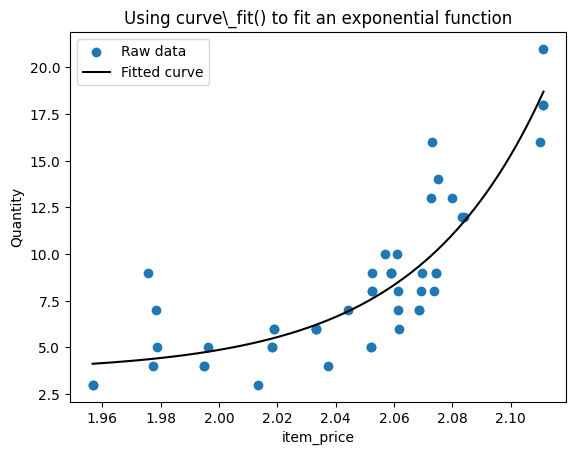

In [118]:
ax = plt.axes()
ax.scatter(df_sku_filtered['item_price'], df_sku_filtered['Quantity'], label='Raw data')
ax.plot(x_fitted, y_fitted, 'k', label='Fitted curve')
ax.set_title(r'Using curve\_fit() to fit an exponential function')
ax.set_ylabel('Quantity')
ax.set_xlabel('item_price')
ax.legend()

In [119]:
with open('./Data Files/fit_data.txt','w') as f:
    f.write(f'a\t{a}\n b\t{b}\n c\t{c}')
    

### Price Elasticity

In [125]:
df_sku['delta_Q'] = df_sku['Quantity'].diff()/df_sku['Quantity']
df_sku['delta_P'] = df_sku['item_price'].diff()/df_sku['item_price']


In [128]:
df_sku['el'] = df_sku['delta_Q'] / df_sku['delta_P']